In [42]:
%%html
<style>
    /* Jupyter */
    .rendered_html tr, .rendered_html th, .rendered_html td {
        text-align: left; 
    }
</style>

# Holt-Winters Method for Time Series Forecasting

### Learning Objectives
- [What is Forecasting?](#What-is-Forecasting?)
- [Forecasting Accuracy](#Forecasting-Accuracy)
- [Simple Forecasting Methods](#Simple-Forecasting-Methods)
- [Exponential Smoothing](#Exponential-Smoothing)
- [Level, Trend and Seasonality](#Level,-Trend-and-Seasonality)
- [Holt-Winters Method](#Holt-Winters-Method)
- [Python Implementation of Holt-Winters](#Python-Implementation-of-Holt-Winters)
- [Note on Initialising Parameters](#Note-on-Intitialising-Parameters)

Need to do:
-Add library implementation of Holt Winters
-Check all code works
-Add plots for comparing forecasting methods

# What is Forecasting?
This notebook will be focusing on time series forecasting and building up to how to use the Holt-Winters method for time series forecasting in particular. But first, what is the difference between the terms __time series analysis__ and __time series forecasting__? 

__Time series analysis__ is a form of descriptive modelling, this means that someone conducting time series analysis will be looking at a dataset to identify trends and seasonal patterns in the historical data, fitting mathematical models to capture the underlying nature of the process generating the data etc. __Time series forecasting__ is a form of predictive modelling with the goal to predict a future value at a particular point in time based on the values we do know.

# Forecasting Accuracy
In a time series the values we do know are referred to as __observed values__ and the values we are trying to forecast are referred to as __expected values__. In general, we use the notation $\mathbf{\hat{y}}$ to denote expected values. 

For example, if we have a series that looks like [2,4,6,8,10], we might forecast the next value of this series to be 12. Using this terminology and notation, the observed values are $y_1=2$, $y_2=4$, $y_3=6$, $y_4=8$, $y_5=10$ i.e the observed series is [2,4,6,8,10] and the next expected value is $\hat{y_6}=12$.

It's important to have some metrics to evaluate the __accuracy__ of our forecasts. 

The __error__ is the difference between an observed value and its forecast. Given a training dataset $\mathbf{\{y_{1},\dots, y_{T}\}}$ and a test dataset $\mathbf{\{y_{T+1}, y_{T+2},\dots\}}$, the error of a forecast at a given time index __T+h__ is denoted as $\mathbf{e_{T+h}=y_{T+h} - \hat{y_{T+h}}}$. 

As the error can be positive or negative it is more helpful to use the absolute terms or as common convention square the error so the value is always positive. 

The __sum of squared errors (SSE)__ is given by $\mathbf{SSE = \sum_{i=1}^{i=n} ( y_{i} - \hat{y_{i}})^{2}}$. The SSE measures the inexplained variability or discrepancy between the observed data and the forecasted data. Another common metric used is the __mean squared error (MSE)__ which is given by $\mathbf{MSE=\frac{1}{n}\sum_{i=1}^{i=n} ( y_{i} - \hat{y_{i}})^{2}}$.

# Simple Forecasting methods

For the next couple of examples let's consider a simple (toy) time series of the number of AI Core students has every month. 

In [43]:
import pandas as pd
import plotly.express as px

# Import relevant data
aicore_df = pd.read_csv('../../DATA/aicorestudents.csv')

# Preview of the data
total_rows = aicore_df.shape[0]
aicore_df.head(n=total_rows)

,Month,Students
0,Jan-20,0
1,Feb-20,50
2,Mar-20,200
3,Apr-20,160
4,May-20,240
5,Jun-20,210
6,Jul-20,180
7,Aug-20,215
8,Sep-20,230


In [57]:
# Plot of the toy time series (make sure you've run previous cell)
fig = px.line(aicore_df, x = 'Month', y = 'Students', title='Number of students at AI Core')
fig.update_traces(mode='markers+lines')
fig.update_layout(title={'text': "Number of students at AI Core",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.show()

In [45]:
# Copy of the AI Core Time Series as an array
aicore_series = [0, 50, 200, 160, 240, 210, 200, 205, 230]

#### Naive Method
This is the simplest forecasting method. For naive forecasts we set all forecasts to be the same value as the last observed value. That is 

$$\mathbf{\hat{y}_{T+1}=y_{T}}$$

For example, if we have a time series that looks like [14,20,18,17,24], then using the naive method the forecast for the next point would be 24. 

In [46]:
#TASK: Code up the naive method to forecast the next point in the time series
def naive_method(series):
    #Insert code here
    return series[-1]

# Test your function returns the correct answer using the AI Core series
naive_forecast=naive_method(aicore_series)
print('Your implementation of the naive method, forecast =', naive_forecast)
print('Correct forecast =',230)

Your implementation of the naive method, forecast = 230
Correct forecast = 230


#### Average Method
This method is simply, the expected value of the next datapoint is the arithmetic mean of all of the previous datapoints. That is

$$\mathbf{\hat{y}_{T+1}=\frac{1}{T}\sum_{i=1}^{i=T} y_{i}}$$

For example, if we have a time series that looks like [19.2,17.8,15.1,14.3,15.0,16.7,15.2], then using the average method the forecast for the next point would be 16.2.

In [47]:
#TASK: Code up the average method to forecast the next point in the time series
def average_method(series):
    #Insert code here
    return sum(series)/len(series)

# Test your function returns the correct answer using the AI Core series
avg_forecast=average_method(aicore_series)
print('Your implementation of the average method, forecast =', avg_forecast)
print('Correct forecast =',166.111)

Your implementation of the average method, forecast = 166.11111111111111
Correct forecast = 166.111


#### Moving Averages

Instead of taking average of all points an improvement to are forecasting method is to only take the average of the n latest datapoints. In this method only the most recent values matter. In practise, this forecasting method can be effective if the right choice of n is used. 

$$\mathbf{\hat{y}_{T+1}=\frac{1}{n}\sum_{i=0}^{i=n-1} y_{T-i}}$$

In [48]:
#TASK: Code up the moving average method to forecast the next point in the time series
def movingaverage_method(series,n):
    #Insert code here
    return average_method(series[-n:])

# Test your function returns the correct answer using the AI Core series
movingavg_forecast=movingaverage_method(aicore_series,3)
print('Your implementation of the moving average method, forecast =', movingavg_forecast)
print('Correct forecast =',211.667)

Your implementation of the moving average method, forecast = 211.66666666666666
Correct forecast = 211.667


#### Weighted Moving Averages

Often we want something in between the extremes of taking a naive forecast where only the most recent datapoint is considered and taking an average of the historical data. A __weighted moving average__ is a moving average but within the window of n points each point is assigned a different weighting. Typically the most recent points are assigned a higher weight as these would be more relevant to the forecast being made. __Note:__ that the weights assigned must add to 1. 

$$\mathbf{\hat{y}_{T+1}=\frac{1}{n}\sum_{i=1}^{i=n} w_{i} . y_{T+1-i}}$$

where $\mathbf{w_{1}, w_{2}, \cdots, w_{n}}$ are weights to be assigned. __Note:__ The weights assigned must add to 1. 

In [79]:
#TASK: Code up the moving average method to forecast the next point in the time series
import numpy as np


def weightedaverage_method(series,weights,n):
    #Insert code here
    #First component in the weights array corresponds to ...
    #weight applied to the most recent observed value in the time series
    weights.reverse()
    weights = np.array(weights,dtype=float)
    nseries = np.array(series[-n:],dtype=float)
    nweightseries = np.multiply(nseries, weights)
    return sum(nweightseries)

# Test your function returns the correct answer using the AI Core series
weighted_forecast = weightedaverage_method(aicore_series,[0.8,0.15,0.05],3)
print('Your implementation of the weighted moving average method, forecast =', weighted_forecast)
print('Correct forecast =',224.75)

Your implementation of the weighted moving average method, forecast = 224.75
Correct forecast = 224.75


Text(0.5, 1.0, 'Number of students at AI Core')

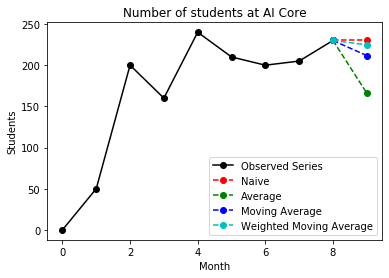

In [82]:
#How to plot this with Plotly instead?
import matplotlib.pyplot as plt

#Plot observed series
plt.plot(aicore_series,'ko-',label='Observed Series')
#Plot all forecasts
plt.plot([8,9],[aicore_series[-1],naive_forecast],'ro--', label='Naive')
plt.plot([8,9],[aicore_series[-1],avg_forecast],'go--', label='Average')
plt.plot([8,9],[aicore_series[-1],movingavg_forecast],'bo--', label='Moving Average')
plt.plot([8,9],[aicore_series[-1],weighted_forecast],'co--', label='Weighted Moving Average')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Students')
plt.title('Number of students at AI Core')

As we can see from the plot, each forecasting method provides a very different next step forecast. The best forecasting method depends on the nature of the Time Series itself. 

# Exponential Smoothing

Now let's consider a weighted average method where we consider __all__ of the observed data points. We want the most recent observations to be weighted the highest whilst the weights decrease __exponentially__ as the observations go further back into the past. This method of forecasting is called __exponential smoothing__ as the weights decay exponentially as we continue to go back to observed points in time.

For example the set of weights used could look like:

$$0.8, 0.8^2, 0.8^3, 0.8^4, 0.8^5, 0.8^6 \cdots$$ or equivalently 

$$0.8, 0.64, 0.512, 0.4096, 0.32768, 0.262144 \cdots$$

The issue here is that these weights do not add up to 1 (using geometric series the sum of the weights in the example above approaches 4).

To solve this issue, exponential smoothing can be encapsulated in conscise and elegant formula:

$$\mathbf{\hat{y_{x+1}}=\alpha \cdot y_{x}+(1-\alpha) \cdot \hat{y_{x-1}}}$$

In a way you can consider exponential smoothing to be a weighted average of two different terms $y_{x}$ and $\hat{y_{x}}$, also now the weights $\alpha$ and $(1-\alpha)$ sum to 1. We can convince ourselves that this succint formula really is equivalent to exponential smoothing by substituting a couple of terms in:
$$
\begin{align}
\hat{y_{x+1}} &= \alpha \cdot y_{x}+(1-\alpha) \cdot \hat{y_{x-1}}
\\&= \alpha \cdot y_{x}+(1-\alpha) \cdot \lbrack \alpha \cdot y_{x-1}+(1-\alpha) \cdot \hat{y_{x-2}}\rbrack
\\&= \alpha \cdot y_{x}+\alpha \cdot (1-\alpha) \cdot y_{x-1}+(1-\alpha)^{2} \cdot \hat{y_{x-2}}
\\\vdots
\\&= \alpha \cdot y_{x}+\alpha(1-\alpha) \cdot y_{x-1} + \alpha(1-\alpha)^{2} \cdot y_{x-2}+ \alpha(1-\alpha)^{3} \cdot y_{x-3}+ \alpha(1-\alpha)^{4} \cdot y_{x-4}+\dots 
\end{align}
$$

By subsituting in more terms recursively we can now see that going back to the beginning of the series (or infinitely backwards), the weights are generated by multiplying $(1-\alpha)$. This is the same as exponential smoothing but now we have a nicer way to represent this.

The parameter $\mathbf{\alpha}$ is referred to as the __smoothing factor__ and can take values $0 \leq \alpha \leq 1$. A large value of $\alpha$ gives more weight to recent changes, the smaller the value of $\alpha$ more distant points are taken into consideration when making the focus. In a way the larger the value of $\alpha$ the quicker the method "forgets" past observations.

In theory, a time series can go back infinitely but in practise when forecasting we can choose a point in time to start our time series. 

The function below takes in a series and applies exponential smoothing to it

In [106]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value of exponential series is same as the original time series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

Let's take a look at exponential smoothing applied to our AI Core example.

Text(0.5, 1.0, 'Number of students at AI Core')

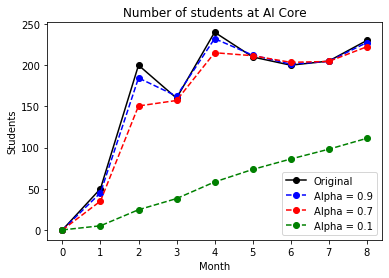

In [107]:
example1 = exponential_smoothing(aicore_series,0.9)
example2 = exponential_smoothing(aicore_series,0.7)
example3 = exponential_smoothing(aicore_series,0.1)
#Plot observed series
plt.plot(aicore_series,'ko-', label='Original')
plt.plot(example1, 'bo--', label='Alpha = 0.9')
plt.plot(example2, 'ro--', label='Alpha = 0.7')
plt.plot(example3, 'go--', label='Alpha = 0.1')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Students')
plt.title('Number of students at AI Core')
#plt.plot(example1, 'bo--', label='Alpha = 0.9')

So far all of the forecasting methods discussed can only be used to forecast a single datapoint into the future. The rest of the notebook will take a look at how building on exponential smoothing we can get to a more useful model that can be used to predict further into the future and take into account other characteristics of the time series we are trying to forecast. 

# Level, Trend and Seasonality
The __level__ of a time series is the expected value/average value of a time series. Note: As the Holt-Winters method for forecasting uses the level as part of the calculation, it is referred to as $\mathbf{l}$ instead of $\mathbf{\hat{y}}$.

The __trend__ is the slope of long-term increase or decrease in the data. Trend is denoted by $\mathbf{b}$ and is given by $\mathbf{b=y_{x} - y_{x-1}}$. Below is an example of a time series with an overall positive trend.

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

df = pd.read_csv('../../DATA/apple.csv')
fig = px.line(df, x = 'Date', y = 'Close', title='Apple Share Prices over time (2014)')
fig.update_layout(title={'text': "Apple Share Prices over time ",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.show()

If a time series repeats at a fixed frequency then this interval is known as it's __season__. The __season length__ is the number of data points within a season, this is denoted by __L__. Below is a time series which displays __seasonality__.

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

df = pd.read_csv('../../DATA/airpassengers.csv')
fig = px.line(df, x = 'Month', y = '#Passengers', title='Air Passenger Data')
fig.update_layout(title={'text': "Apple Share Prices over time ",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.show()

# Holt-Winters Method

The __Holt-Winters model__ (also referred to as __triple exponential smoothing__) predicts a current or future value by computing the combined effects of level, trend and seasonality. Note that non-seasonal series cannot be forecasted using the Holt-Winters method.

The idea behind the Holt-Winters model is to apply exponential smoothing to the level, trend and seasonal components. The smoothing is applied across the seasons e.g. the 2nd point of the season would be exponentially smoothed with the 2nd point of the second season, the 2nd point from the third season etc.

## Holts-Winters Method Formulas:

__Level__: $l_{t} =\alpha(y_{t}- s_{t-L})+(1-\alpha)(\ell_{t-1}+b_{t-1})$

__Trend__: $b_{t}=\beta(\ell_{t}-\ell_{t-1})+(1-\beta)b_{t-1}$

__Seasonal__: $s_{t}=\gamma (y_{t}-\ell_{t})+(1-\gamma)s_{t-L}$

__Forecast__: $\hat{y_{t+m}}=\ell_{t}+mb_{t} + s_{t-L+1+(m-1) mod L} $

where 

$\mathbf{\alpha}=$ smoothing paramenter for level component

$\mathbf{\beta}=$ smoothing parameter for trend component

$\mathbf{\gamma}=$ smoothing parameter for seasonal component

$m =$ time index being forecasted (integer) 

$L=$ season length

$\ell_{t} = $level component at time t

$b_{t}= $trend component at time t

$s_{t}=$ seasonal component at time t

The time index t+m can take any integer value meaning we can now forecast any number of time steps into the future!!! 

## Initialising Holt-Winters

#### Initial Trend
Initial trend for a time series with a seasonal component can be found be take the average of the trend averages across each season. i.e. 

$b_{0}=\frac{1}{L}(\frac{{y_{L+1}} − {y_{1}}}{L}+\frac{{y_{L+2}} − {y_{2}}}{L}+\cdots+\frac{{y_{L+L}} − {y_{L}}}{L})$

In [114]:
# Python Implementation of initialising trend
def initial_trend(series, slen):
    sum = 0.0
    for i in range(slen):
        sum += float(series[i+slen] - series[i]) / slen
    return sum / slen

The code below computes the intial seasonal component. For more information on the mathematics behind this see the following link.

In [115]:
def initial_seasonal_components(series, slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(series)/slen)
    # compute season averages
    for j in range(n_seasons):
        season_averages.append(sum(series[slen*j:slen*j+slen])/float(slen))
    # compute initial values
    for i in range(slen):
        sum_of_vals_over_avg = 0.0
        for j in range(n_seasons):
            sum_of_vals_over_avg += series[slen*j+i]-season_averages[j]
        seasonals[i] = sum_of_vals_over_avg/n_seasons
    return seasonals

# Python Implementation of Holt-Winters
Finally let's implement the Holt-Winters algorithm in Python

In [ ]:
def triple_exponential_smoothing(series, slen, alpha, beta, gamma, n_preds):
    result = []
    seasonals = initial_seasonal_components(series, slen)
    for i in range(len(series)+n_preds):
        if i == 0: # initial values
            smooth = series[0]
            trend = initial_trend(series, slen)
            result.append(series[0])
            continue
        if i >= len(series): # we are forecasting
            m = i - len(series) + 1
            result.append((smooth + m*trend) + seasonals[i%slen])
        else:
            val = series[i]
            last_smooth, smooth = smooth, alpha*(val-seasonals[i%slen]) + (1-alpha)*(smooth+trend)
            trend = beta * (smooth-last_smooth) + (1-beta)*trend
            seasonals[i%slen] = gamma*(val-smooth) + (1-gamma)*seasonals[i%slen]
            result.append(smooth+trend+seasonals[i%slen])
    return result

Add example showing plot of Holt Winters

In [ ]:
Add library implementation of Holt-Winters

# Note on Initialising Parameters
#### Trend, Slope, Alpha, Beta, Gamma
The simplest way to optimize the values of alpha, beta, gamma is to run the Holt-Winters method on a set of know observed values and choose the parameters which minimize the SSE. Trial and error should give a reasonable estimate for alpha, beta and gamma. A better way to optimise for alpha, beta, gamma is to use the Nelder - Mead algorithm Add links to further reading here.

## Summary
- Include summary of key takeaways
- Include challenges